In [1]:
import math
import random
import seaborn as sns

In [2]:
def weight(x: float) -> float:
    norm = math.exp(- x * x / 2) / math.sqrt(2 * math.pi)
    laplace = math.exp(-abs(x)) / 2
    return laplace / norm

In [3]:
class WeightedSample:
    """
    https://qiita.com/kaityo256/items/64c12bb8c8946d7f03c6
    """
    def __init__(self, ww: list[float]):
        # Walker's Alias法
        avg = math.fsum(ww) / len(ww)
        prob = [w / avg for w in ww]
        small = []
        large = []
        for i, p in enumerate(prob):
            if p < 1.0:
                small.append(i)
            else:
                large.append(i)
        index = list(range(len(ww)))
        while small and large:
            j = small.pop()
            k = large[-1]
            index[j] = k
            prob[k] = prob[k] - 1.0 + prob[j]
            if prob[k] < 1.0:
                small.append(k)
                large.pop()
        self.prob = prob
        self.index = index
    
    def sample(self):
        k = random.randrange(len(self.prob))
        p = self.prob[k]
        if random.random() < p:
            return k
        else:
            return self.index[k]

In [4]:
ws = WeightedSample([1,2,3,4,5])

In [5]:
ws.prob

[0.3333333333333333, 0.6666666666666666, 1.0, 1.0, 0.6666666666666667]

In [6]:
ws.index

[4, 4, 2, 3, 3]

In [7]:
c = [0] * 5
for _ in range(10 ** 6):
    c[ws.sample()] += 1
c

[66798, 133467, 200056, 266063, 333616]

In [8]:
[i / c[0] for i in c]

[1.0,
 1.9980688044552233,
 2.9949399682625226,
 3.9830982963561783,
 4.994401029970957]

In [9]:
M = 10 ** 6
zz = [random.normalvariate() for _ in range(M)]
ww = [weight(z) for z in zz]
weighted_sampler = WeightedSample(ww)
laplace_sampled = [zz[weighted_sampler.sample()] for _ in range(10 ** 5)]

In [10]:
laplace_sampled[:10]

[-1.1853197249012284,
 -1.1534357660400025,
 0.38397293163466556,
 -2.318741516883419,
 -2.5609065154288473,
 -1.6124586099852054,
 -0.7851166354803345,
 0.012793769053077294,
 -0.19711616403596674,
 -2.4491579905197116]

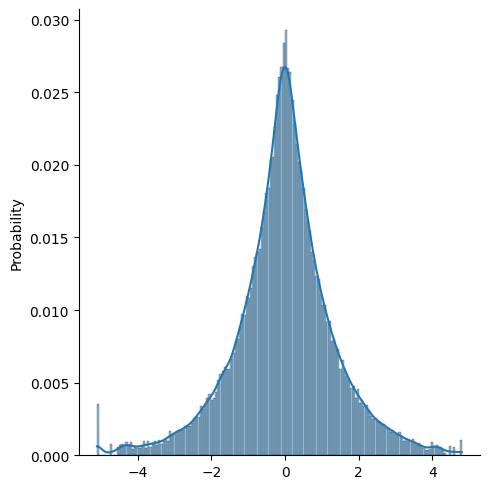

In [11]:
sns.displot(laplace_sampled, kde=True, stat='probability')